<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-11 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Credit Scoring </h2> </html>


#### This is a training example of credit scoring using the Kaggle.com Dataset
(https://www.kaggle.com/datasets/urvishvekariya/credit-risk-assessment/data)

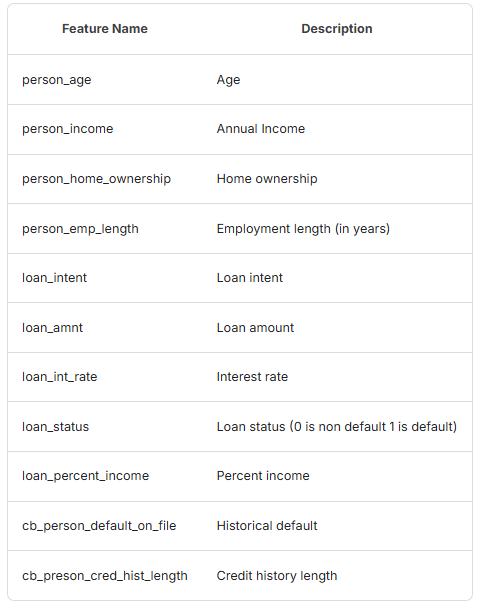

In [63]:
#pip install seaborn

______________________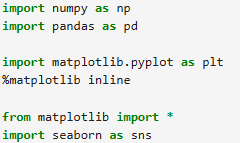

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import *
import seaborn as sns

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

___________________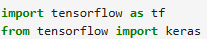

In [66]:
import tensorflow as tf
from tensorflow import keras

___________________

In [67]:
print(tf.__version__)

2.18.0


______________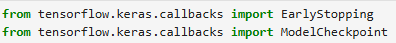

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

__________________

In [69]:
np.random.seed(42)

_____________________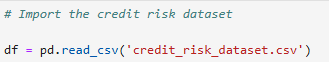

In [70]:
df = pd.read_csv('credit_risk_dataset.csv')

____________________

In [71]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


__________________________

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


<html> <h3 style="font-style:italic; color:blue;"> Data preprocessing </h3> </html>

___________________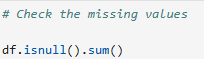

In [73]:
df.isnull(). sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [74]:
# Impute missing values with mean

imputer = SimpleImputer(strategy='mean')

df['person_emp_length'] = imputer.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer.fit_transform(df[['loan_int_rate']])

____________________

In [75]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [76]:
# It doesn't have any NaN(s)

____________________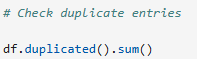

In [77]:
df.duplicated().sum()


165

_________________________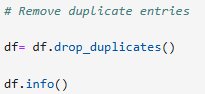

In [78]:
df= df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  object 
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


_______________________________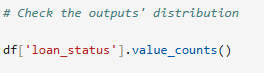

In [79]:
df['loan_status']. value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

__________________________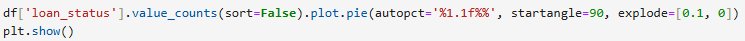

In [80]:
df['loan_status'].value_counts(sort=False).plot.pie(autopct='%1.1%%', startangle=90, explode=[0.1 0])
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2653445828.py, line 1)

In [ ]:
# The dataset is unbalanced

_____________________________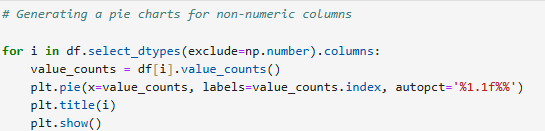

In [ ]:
for i in df.select_dtypes(exclude=np.number).columns:
    value_counts = df[i].value_counts()
    plt.pie(x=value_counts, labels=value_counts.index, autopct='%1.1%%')
    plt.show()

_____________________________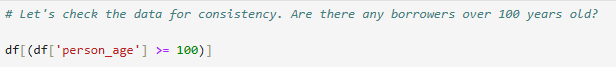

In [ ]:
df[(df['person_age'] >=100)]

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [ ]:
# For this analysis, all data entries with age 100 and above can be disregarded. This is not of importance

df = df.drop(df[(df['person_age'] >= 100)].index)

In [ ]:
fig = plt.figure(figsize=(11, 7))
sns.countplot(data = df, x = 'person_age', hue = 'loan_status')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show();

In [ ]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')

plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.show();

In [ ]:
# Renters often default on loans, homeowners rarely do

______________________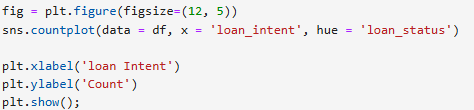

In [ ]:
fig = plt.figure(figzise=(12, 5))
sns.countplot(data = df, x= 'loan_intent', hue = 'loan_status')

plt.xlabel('loan Intent')
plt.ylabel('Count')
plt.show();

In [ ]:
# Medical loans and Debt-Consolidation loans are more risky

________________________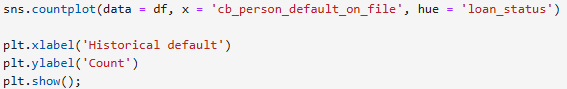

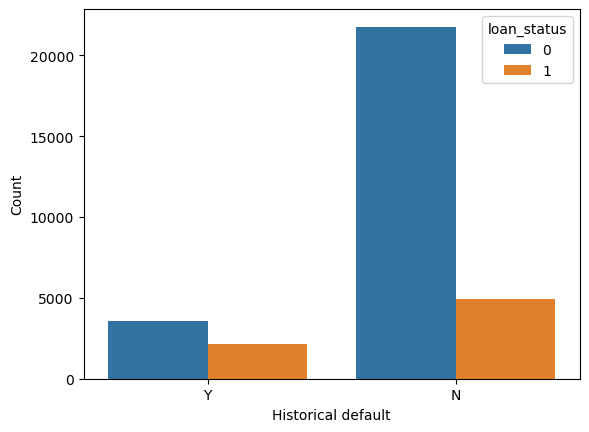

In [82]:
sns.countplot(data = df, x = 'cb_person_default_on_file', hue = 'loan_status')

plt.xlabel('Historical default')
plt.ylabel('Count')
plt.show();

In [83]:
# Those who have defaulted on loans in the past are highly likely to default on a new loan

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [84]:
# transform categorical variables into integers

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

For Categorical variables with more than 2 variants, it is more correct to use the one-hot encoding method. 

 Detailed description is here:

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

______________________

In [85]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3


_________________________

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  int64  
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  int64  
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  int64  
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


<html> <h3 style="font-style:italic; color:blue;"> Heat Map</h3> </html>

___________________________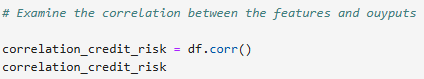

In [87]:
correlation_credit_risk = df.corr()
correlation_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.173293,0.031606,0.161060,0.024863,0.050680,0.011095,-0.022698,-0.042300,-0.005175,0.859215
person_income,0.173293,1.000000,0.199254,0.133001,0.016495,0.265947,0.000832,-0.145005,-0.254472,0.003617,0.117614
person_home_ownership,0.031606,0.199254,1.000000,0.228470,0.017144,0.129130,-0.131811,-0.218429,-0.135182,0.061571,0.025637
person_emp_length,0.161060,0.133001,0.228470,1.000000,0.016262,0.111872,-0.053035,-0.081303,-0.053013,0.027746,0.143095
loan_intent,0.024863,0.016495,0.017144,0.016262,1.000000,0.018943,0.006193,0.065858,-0.002187,-0.010609,0.016282
loan_amnt,0.050680,0.265947,0.129130,0.111872,0.018943,1.000000,0.139603,0.105736,0.572824,-0.039341,0.041865
loan_int_rate,0.011095,0.000832,-0.131811,-0.053035,0.006193,0.139603,1.000000,0.320063,0.114418,-0.477046,0.015025
loan_status,-0.022698,-0.145005,-0.218429,-0.081303,0.065858,0.105736,0.320063,1.000000,0.379697,-0.179385,-0.016498
loan_percent_income,-0.042300,-0.254472,-0.135182,-0.053013,-0.002187,0.572824,0.114418,0.379697,1.000000,-0.036204,-0.031457
cb_person_default_on_file,-0.005175,0.003617,0.061571,0.027746,-0.010609,-0.039341,-0.477046,-0.179385,-0.036204,1.000000,-0.004169


#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [88]:
corr_order = df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)
corr_order

,loan_status
loan_status,1.000000
loan_percent_income,0.379697
loan_int_rate,0.320063
loan_amnt,0.105736
loan_intent,0.065858
cb_person_cred_hist_length,-0.016498
person_age,-0.022698
person_emp_length,-0.081303
person_income,-0.145005
cb_person_default_on_file,-0.179385


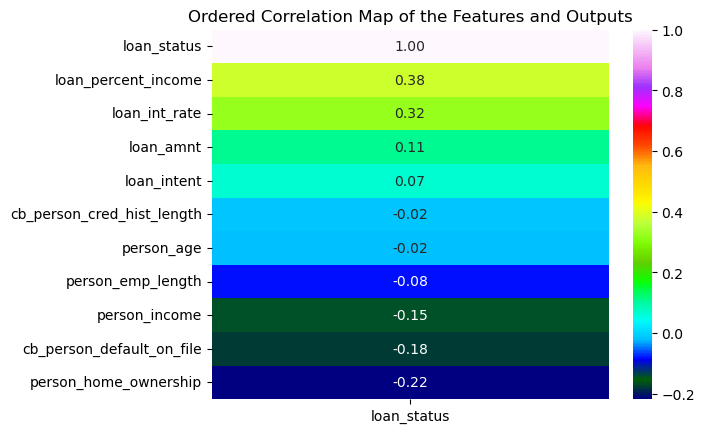

In [89]:
# Heat map for correlations with outputs

sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

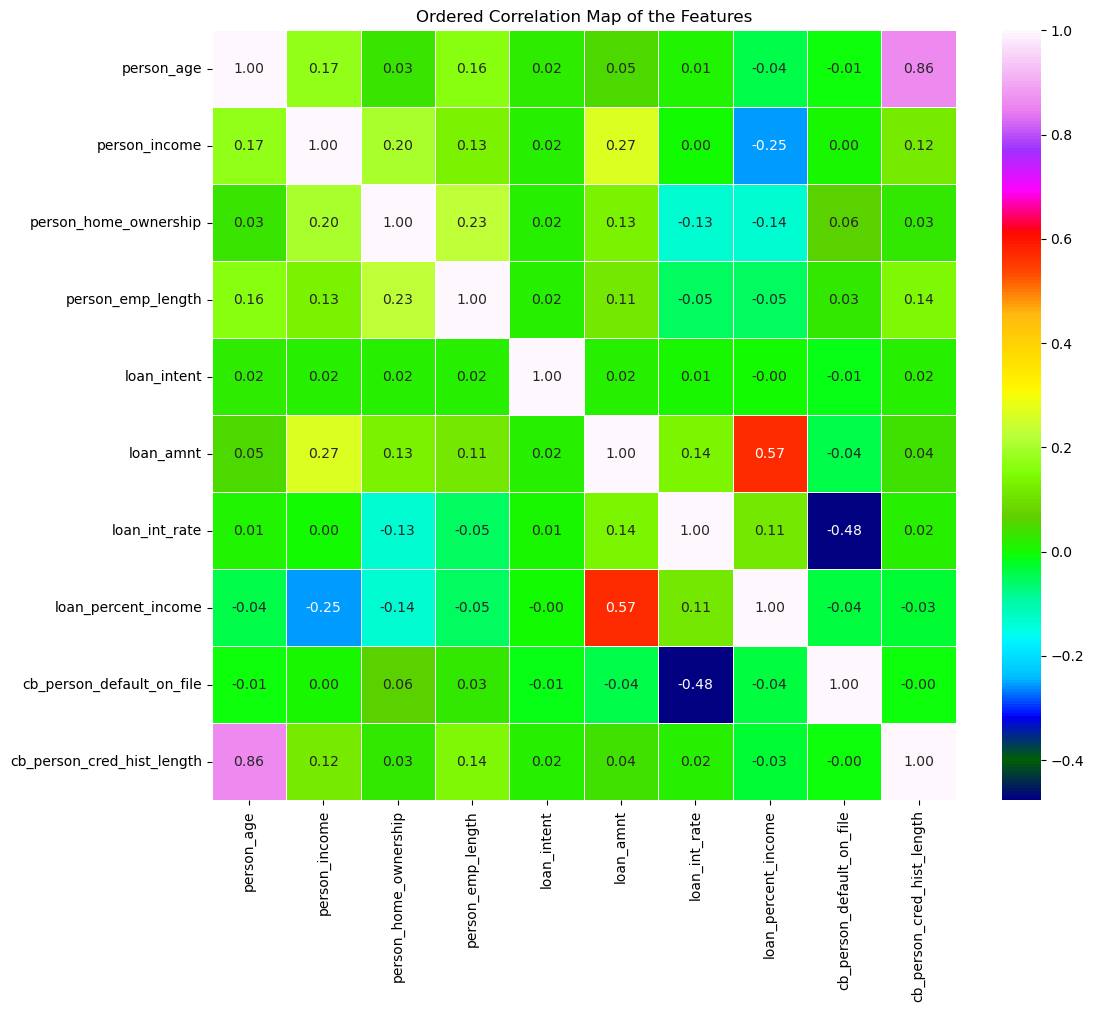

In [90]:
# Heat map for features without outputs

plt.figure(figsize=(12,10))
corr_order_without_target = df.drop('loan_status', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

______________________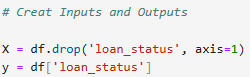

In [91]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


___________________________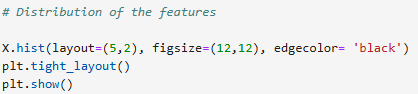

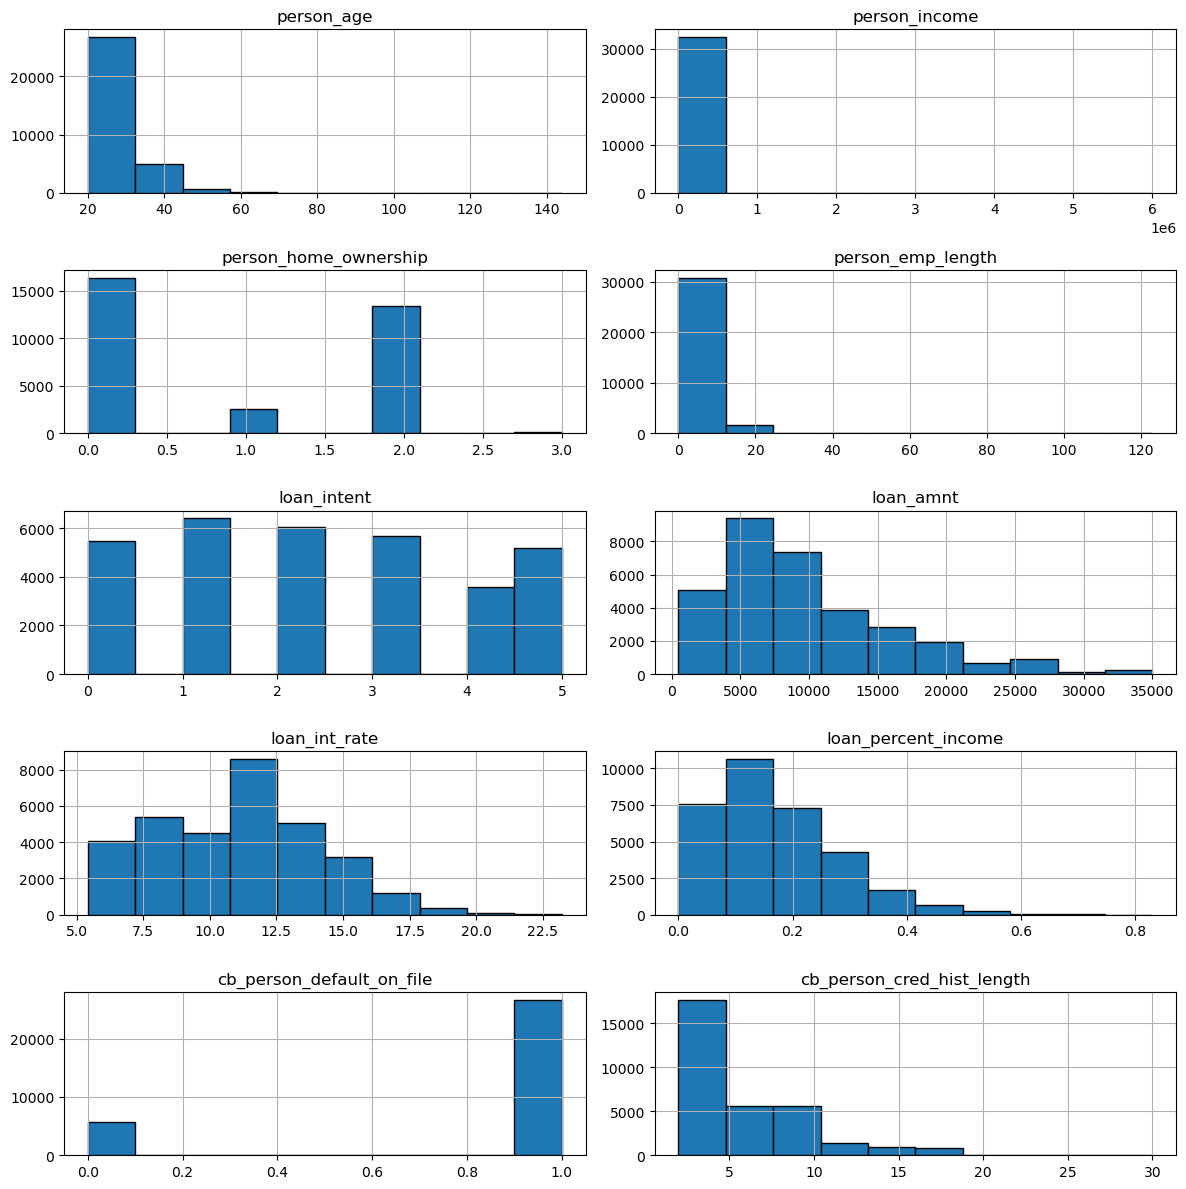

In [92]:
X.hist(layout=(5,2), figsize=(12,12), edgecolor= 'black')
plt.tight_layout()
plt.show()

#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [93]:
# Splitting the datasets into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# changing the distribution of values so that the mean of the observed values is -0- 
# and the standard deviation is 1.

scaler = StandardScaler()
X_train_imb = scaler.fit_transform(X_train)
X_test_imb =  scaler.transform (X_test)

___________________________

In [95]:
X_train_imb.shape

(25932, 10)

<html> <h3 style="font-style:italic; color:blue;"> Multi Layer Perceptron (MLP) </h3> </html>

____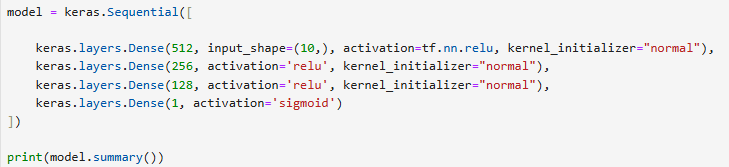

In [99]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(10,), activation=tf.nn.relu, kernel_initializer="normal"),
keras.layers.Dense(256, activation='relu', kernal_initializer="normal"),
keras.layers.Dense(128, activation='relu', kernal_initializer="normal"),
keras.layers.Debse(1, activation='sigmoid')
])
print(model.summary())

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized keyword arguments passed to Dense: {'kernal_initializer': 'normal'}

____________________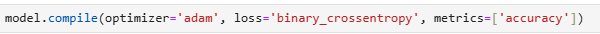

In [100]:
model.comile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'model' is not defined

__________________________

In [ ]:
mc = ModelCheckpoint

___________________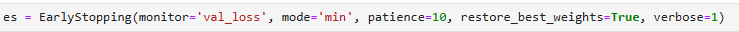

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 

epochs=10
</h4> </html>

__________________________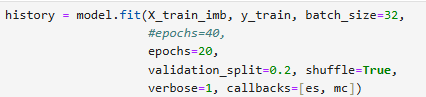

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

_______________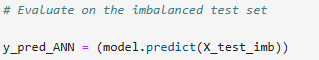

#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [ ]:
print(y_pred_ANN[:10])
y_pred_ANN_labels = (y_pred_ANN >= 0.5).astype(int)

In [ ]:
print("Imbalanced MLP Dataset Results")
print(classification_report(y_test, y_pred_ANN_labels))

# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred_ANN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Random Forest </h3> </html>

____________________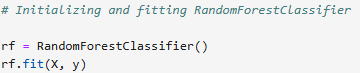

_______________________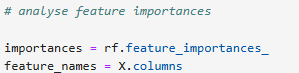

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [ ]:
# Sort feature importances in descending order

indices = np.argsort(importances)[::-1]

In [ ]:
# Print feature ranking

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

In [ ]:
# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest

new_random = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_imb, y_train)

______________________

__________________________

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Confusion matrix for Random Forest

cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();


<html> <h3 style="font-style:italic; color:blue;"> Logistic Regression </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [ ]:
# Feature selection

# This is a meta-transformer that can be used with any model that assigns importance to each feature 
# through a specific importance_getter attribute called after training

feature_selector = SelectFromModel(LogisticRegression())
X_train_selected = feature_selector.fit_transform(X_train_imb, y_train)
X_test_selected = feature_selector.transform(X_test_imb)


In [ ]:
# Defining the parameter grid for grid search

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imb, y_train)

In [ ]:
# Print the best parameters and the best cross-validation score

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

______________________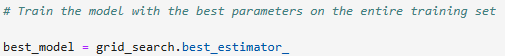

_________________________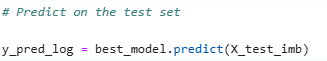

_________________________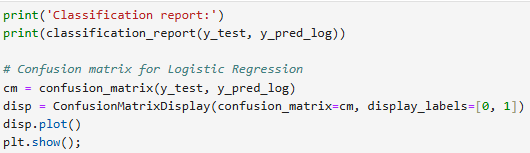

<html> <h3 style="font-style:italic; color:blue;"> Model Performance and Results Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 2next cells.

In [ ]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [ ]:
imbalance_ai_models = ['Random Forest', 'Logistic Regression', 'MLP']
prediction_imb = [y_pred_random, y_pred_log, y_pred_ANN]

__________________________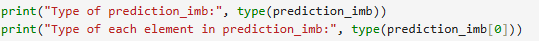

_________________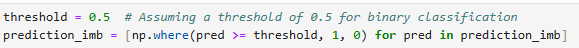

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [ ]:
accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []
for x in range(0, len(prediction_imb)):
    acc_score = np.round(accuracy_score(y_test, prediction_imb[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction_imb[x]) * 100, 2)
    auc_imb.append(auc_sc)

In [ ]:
model_perform_imb  = {'Imbalance AI Models':imbalance_ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

In [ ]:
model_imb = model_data_imb.set_index('Imbalance AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of credit risk on imbalanaced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Create and train your own LSTM model
2) Add all the LSTM's Error metrics: Accuracy, Precision, Recall, F1-Score and AUC to the final histogram "ML Models performance...".

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>